<a href="https://colab.research.google.com/github/adeshshah2912/DS_Python/blob/main/Assignment_18_Forecasting_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_excel (r'/content/Airlines+Data.xlsx')
df.head()

,Month,Passengers,t,t_square,log_Passengers
0,1995-01-01,112,1,1,2.049218
1,1995-02-01,118,2,4,2.071882
2,1995-03-01,132,3,9,2.120574
3,1995-04-01,129,4,16,2.110590
4,1995-05-01,121,5,25,2.082785


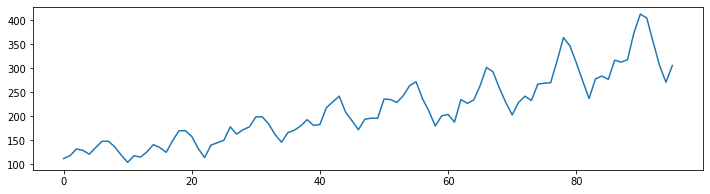

In [3]:
plt.figure(figsize=(12,3))
df.Passengers.plot()

In [4]:
df.rename(columns = {'Month':'Date'}, inplace = True)

In [5]:
df.head()

,Date,Passengers,t,t_square,log_Passengers
0,1995-01-01,112,1,1,2.049218
1,1995-02-01,118,2,4,2.071882
2,1995-03-01,132,3,9,2.120574
3,1995-04-01,129,4,16,2.110590
4,1995-05-01,121,5,25,2.082785


In [6]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

df["Month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction

#df["Day"] = df.Date.dt.strftime("%d") # Day extraction
#df["wkday"] = df.Date.dt.strftime("%A") # weekday extraction

In [7]:
df.head()

,Date,Passengers,t,t_square,log_Passengers,Month,year
0,1995-01-01,112,1,1,2.049218,Jan,1995
1,1995-02-01,118,2,4,2.071882,Feb,1995
2,1995-03-01,132,3,9,2.120574,Mar,1995
3,1995-04-01,129,4,16,2.110590,Apr,1995
4,1995-05-01,121,5,25,2.082785,May,1995


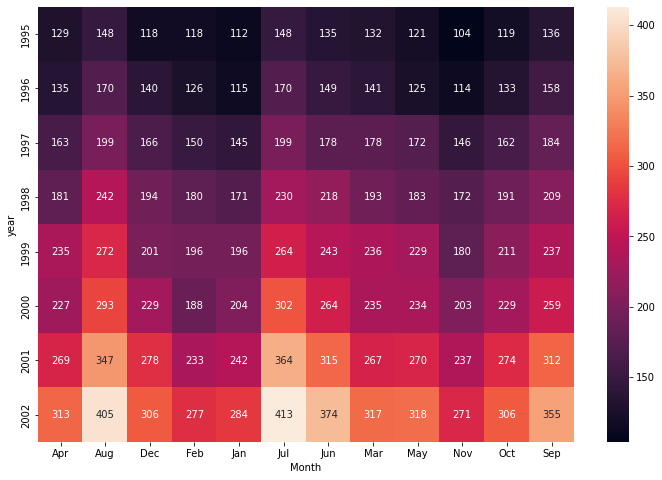

In [8]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.savefig("image1.png")


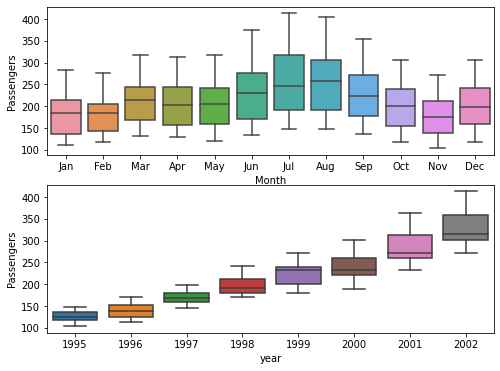

In [9]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

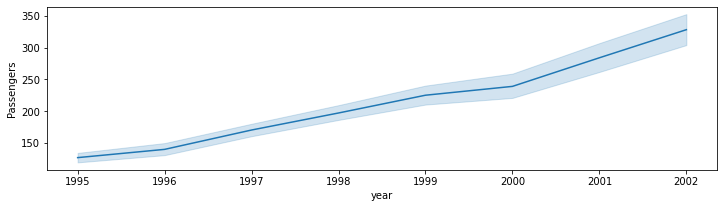

In [10]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

In [11]:
df.head()

,Date,Passengers,t,t_square,log_Passengers,Month,year
0,1995-01-01,112,1,1,2.049218,Jan,1995
1,1995-02-01,118,2,4,2.071882,Feb,1995
2,1995-03-01,132,3,9,2.120574,Mar,1995
3,1995-04-01,129,4,16,2.110590,Apr,1995
4,1995-05-01,121,5,25,2.082785,May,1995


In [12]:
df1=pd.get_dummies(df,columns=['Month'])

In [13]:
df1

,Date,Passengers,t,t_square,log_Passengers,year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1995-01-01,112,1,1,2.049218,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,2.071882,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,2.120574,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,2.110590,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,2.082785,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,2.607455,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,8649,2.550228,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,8836,2.485721,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,9025,2.432969,2002,0,0,0,0,0,0,0,0,0,1,0,0


#Splitting data

In [16]:
Train = df1.head(84)
Test = df1.tail(12)

In [17]:
Train

,Date,Passengers,t,t_square,log_Passengers,year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1995-01-01,112,1,1,2.049218,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,2.071882,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,2.120574,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,2.110590,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,2.082785,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,80,6400,2.540329,2001,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,81,6561,2.494155,2001,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,82,6724,2.437751,2001,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,83,6889,2.374748,2001,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
Test

,Date,Passengers,t,t_square,log_Passengers,year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
84,2002-01-01,284,85,7225,2.453318,2002,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,86,7396,2.442480,2002,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,87,7569,2.501059,2002,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,88,7744,2.495544,2002,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,89,7921,2.502427,2002,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,90,8100,2.572872,2002,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,91,8281,2.615950,2002,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,92,8464,2.607455,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,8649,2.550228,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,8836,2.485721,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


53.19923653480278

In [20]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

319.2756935483136

In [21]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.051888979330926

In [25]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

In [26]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612093058

In [27]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

321.70698036505127

In [28]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

319.15354524433974

In [29]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,26.360818
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
6,rmse_Mult_add_sea,319.153545
1,rmse_Exp,319.275694
5,rmse_Mult_sea,321.706980


Predict for new time period

In [35]:
df2 = pd.read_excel (r'/content/Airlines_predict.xlsx')

In [36]:
df2

,Date,t,t_square
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [37]:
df2["Month"] = df2.Date.dt.strftime("%b") # month extraction
df2["year"] = df2.Date.dt.strftime("%Y") # year extraction

In [40]:
df3=pd.get_dummies(df2,columns=['Month'])

In [41]:
df3

,Date,t,t_square,year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,2003-01-01,97,9409,2003,0,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,98,9604,2003,0,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,99,9801,2003,0,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,100,10000,2003,1,0,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,101,10201,2003,0,0,0,0,0,0,0,0,1,0,0,0
5,2003-06-01,102,10404,2003,0,0,0,0,0,0,1,0,0,0,0,0
6,2003-07-01,103,10609,2003,0,0,0,0,0,1,0,0,0,0,0,0
7,2003-08-01,104,10816,2003,0,1,0,0,0,0,0,0,0,0,0,0
8,2003-09-01,105,11025,2003,0,0,0,0,0,0,0,0,0,0,0,1
9,2003-10-01,106,11236,2003,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
#Build the model on entire data set
model_full = smf.ols('Passengers~t+t_square+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data=df1).fit()

In [43]:
pred_new  = pd.Series(model_full.predict(df3))
pred_new

0     328.328687
1     329.438178
2     359.547668
3     354.907159
4     356.141650
5     385.376141
6     413.360631
7     412.845122
8     385.829613
9     358.939103
10    335.423594
11    362.283085
dtype: float64

In [45]:
df3["forecasted_Passengers"] = pd.Series(pred_new)

In [46]:
new_var = pd.concat([df1,df3])

In [47]:
new_var

,Date,Passengers,t,t_square,log_Passengers,year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,forecasted_Passengers
0,1995-01-01,112.0,1,1,2.049218,1995,0,0,0,0,1,0,0,0,0,0,0,0,NaN
1,1995-02-01,118.0,2,4,2.071882,1995,0,0,0,1,0,0,0,0,0,0,0,0,NaN
2,1995-03-01,132.0,3,9,2.120574,1995,0,0,0,0,0,0,0,1,0,0,0,0,NaN
3,1995-04-01,129.0,4,16,2.110590,1995,1,0,0,0,0,0,0,0,0,0,0,0,NaN
4,1995-05-01,121.0,5,25,2.082785,1995,0,0,0,0,0,0,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2003-08-01,NaN,104,10816,NaN,2003,0,1,0,0,0,0,0,0,0,0,0,0,412.845122
8,2003-09-01,NaN,105,11025,NaN,2003,0,0,0,0,0,0,0,0,0,0,0,1,385.829613
9,2003-10-01,NaN,106,11236,NaN,2003,0,0,0,0,0,0,0,0,0,0,1,0,358.939103
10,2003-11-01,NaN,107,11449,NaN,2003,0,0,0,0,0,0,0,0,0,1,0,0,335.423594


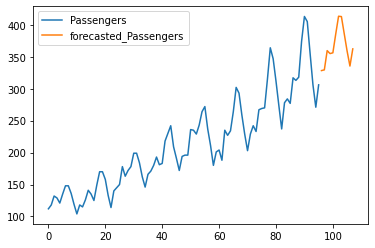

In [48]:
new_var[['Passengers','forecasted_Passengers']].reset_index(drop=True).plot()